# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Alif Nasrulloh
- **Email:** alifnasrulloh.jbg@gmail.com
- **ID Dicoding:** malifnasrulloh

## Menentukan Pertanyaan Bisnis

- Bagaimana dengan analisis penjualan?
- Produk apa yang mempunyai qty terbanyak?
- Produk apa yang memiliki penjualan terbanyak?
- Bagaimana korelasi antara berat produk dan harga produk?
- Metode penjualan apa yang sering dipakai oleh customer?
- Bagaimana skor ulasan untuk setiap produk? dan produk apa yang layak menjadi 'best seller' untuk masing-masing kategori?
- Bagaimana korelasi antara panjang deskripsi suatu produk terhadap skor ulasannya?
- Negara apa yang memiliki total pembelian/customer terbanyak?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import seaborn as sn
import locale
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt



```
# Ini diformat sebagai kode
```

## Data Wrangling

### Gathering Data

ganti locale ke United States untuk keperluan formatting pada currency

In [2]:
locale.setlocale(locale.LC_ALL,'en_US.UTF-8')

'en_US.UTF-8'

ambil semua data yang diperlukan dari file csv

In [3]:
customers = pd.read_csv("data/customers_dataset.csv")
sellers = pd.read_csv("data/sellers_dataset.csv")
geolocate = pd.read_csv("data/geolocation_dataset.csv")
order_items = pd.read_csv("data/order_items_dataset.csv")
order_payments = pd.read_csv("data/order_payments_dataset.csv")
order_reviews = pd.read_csv("data/order_reviews_dataset.csv")
orders = pd.read_csv("data/orders_dataset.csv")
product_translation = pd.read_csv("data/product_category_name_translation.csv")
products = pd.read_csv("data/products_dataset.csv")

### Assessing Data

buat fungsi untuk menguraikan dict saat output nanti sehingga bisa lebih mudah di akses
misal {("alip",5):1,("alip", 4):3} =====> {"alip":{5:1, 4:3}}

In [ ]:
def decode_dict(data: dict):
    temp = {}
    for k, v in data.items():
        if k[0] not in temp.keys():
            temp[k[0]] = {}
        temp[k[0]][k[1]] = v
    return temp

Ubah bahasa pada tabel product kolom _product\_category\_name_ agar memakai bahasa inggris

In [ ]:
products = pd.merge(
    products, product_translation, how="inner", on="product_category_name"
)
products.drop(columns="product_category_name", inplace=True)
products.rename(
    columns={"product_category_name_english": "product_category_name"}, inplace=True
)

buat fungsi untuk menghitung korelasi antara 2 data

In [ ]:
def Pearson_correlation(X,Y):
    if len(X)==len(Y):
        Sum_xy = sum((X-X.mean())*(Y-Y.mean()))
        Sum_x_squared = sum((X-X.mean())**2)
        Sum_y_squared = sum((Y-Y.mean())**2)       
        corr = Sum_xy / np.sqrt(Sum_x_squared * Sum_y_squared)
    return corr

fungsi untuk mencari item yang banyak terjual

In [ ]:
def getMostSoldItems(product_df: pd.DataFrame, order_items_df: pd.DataFrame,n =5):
    df = pd.merge(product_df, order_items_df, how="inner", on="product_id")
    
    result = df['product_category_name'].value_counts()
    return pd.DataFrame(data={"product_category_name":result.index, "total_sold":result.values}).sort_values(by="total_sold", ascending=False).head(n)
getMostSoldItems(product_df=products, order_items_df=order_items)
order_payments

,product_category_name,total_sold
0,cama_mesa_banho,11115
1,beleza_saude,9670
2,esporte_lazer,8641
3,moveis_decoracao,8334
4,informatica_acessorios,7827


In [61]:
order_payments.payment_type.unique()[:-1]

array(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype=object)

In [7]:
getMostSoldItems(
        product_df=products, order_items_df=order_items
    )

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11
112646,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
112647,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
112648,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,3,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28


fungsi untuk mendapatkan total order, pakai parameter deliveredOnly untuk menfilter agar menghitung yang sudah status 'delivered'

In [ ]:
def getTotalOrder(order_df: pd.DataFrame, deliveredOnly: bool):
    return len(
        order_df
        if deliveredOnly == False
        else order_df[order_df.order_status == "delivered"]
    )

fungsi untuk mencari total income selama penjualan

In [ ]:
def getTotalIncome(
    order_df: pd.DataFrame, order_item_df: pd.DataFrame, deliveredOnly: bool
):
    order_df = (
        order_df[order_df.order_status == "delivered"]
        if deliveredOnly == True
        else order_df
    )
    # asumsi saya freight cost dibayar oleh pembeli jadi tidak masuk ke pendapatan
    df = pd.merge(order_df, order_item_df, how="inner", on="order_id")
    return locale.currency(df.price.sum(), grouping=True)

fungsi untuk mencari rata rata banyak item yang terjual setiap per hari

In [ ]:
def getAverageSoldItems(order_df: pd.DataFrame):
    return (
        order_df.groupby(by=["order_purchase_timestamp"])
        .order_purchase_timestamp.value_counts()
        .mean()
    )

fungsi untuk distribute nama produk dengan pembayaran apa yang dipakai

In [ ]:
def getProductPaymentDistribute(
    product_df: pd.DataFrame,
    order_items_df: pd.DataFrame,
    order_payments_df: pd.DataFrame,
    only_most_sold_item: bool = False,
    most_sold_item: pd.DataFrame = None,
):
    df = pd.merge(product_df, order_items_df, how="inner", on="product_id")
    df = pd.merge(
        df[["product_category_name", "order_id"]],
        order_payments_df[["order_id", "payment_type"]],
        how="inner",
        on="order_id",
    )

    if only_most_sold_item:
        df = df[df.product_category_name.isin(most_sold_item.product_category_name)]

    df = df[["product_category_name", "payment_type"]].value_counts(sort=False)

    result = pd.DataFrame(
        data={
            "product_category_name": df.index.map(lambda x: x[0]),
            "payment_type": df.index.map(lambda x: x[1]),
            "total_used": df.values,
        }
    )

    return result


a = getProductPaymentDistribute(
    products, order_items, order_payments, True, mostSoldItem
)

In [165]:
a

,product_category_name,payment_type,total_used
0,beleza_saude,boleto,1860
1,beleza_saude,credit_card,7566
2,beleza_saude,debit_card,157
3,beleza_saude,voucher,389
4,cama_mesa_banho,boleto,1875
5,cama_mesa_banho,credit_card,8959
6,cama_mesa_banho,debit_card,142
7,cama_mesa_banho,voucher,847
8,esporte_lazer,boleto,1772
9,esporte_lazer,credit_card,6635


In [ ]:
a.value_counts(sort=False)

Index(['boleto', 'credit_card', 'debit_card', 'voucher', 'boleto',
       'credit_card', 'debit_card', 'voucher', 'boleto', 'credit_card',
       'debit_card', 'voucher', 'boleto', 'credit_card', 'debit_card',
       'voucher', 'boleto', 'credit_card', 'debit_card', 'voucher'],
      dtype='object')

In [109]:
a

,product_category_name,payment_type
2,esporte_lazer,credit_card
8,moveis_decoracao,credit_card
9,moveis_decoracao,credit_card
10,moveis_decoracao,credit_card
11,moveis_decoracao,voucher
...,...,...
117596,informatica_acessorios,boleto
117597,informatica_acessorios,boleto
117598,informatica_acessorios,boleto
117599,informatica_acessorios,boleto


In [90]:
a[('beleza_saude','boleto')]

1860

fungsi untuk mencari korelasi antara berat suatu produk denga harga produk itu sendiri

In [ ]:
def getCorrelatProduct(product_df: pd.DataFrame, order_items_df: pd.DataFrame):
    df = pd.merge(product_df, order_items_df, how="inner", on="product_id")
    # kategorikan berdasarkan berat produk dengan rata rata harga yang didapat (top 10 barang terberat)
    return (
        df.groupby(by=["product_weight_g"])
        .agg({"price": "mean"})
        .sort_values(by=["product_weight_g"], ascending=False)
        .reset_index()
        .to_dict()
    )

fungsi membuat dataset baru untuk keperluan rfm nanti

In [ ]:
def createRFM(order_df: pd.DataFrame, order_items_df: pd.DataFrame):
    df = pd.merge(order_df, order_items_df, how="inner", on="order_id")
    last_purchase = order_df.order_purchase_timestamp.max()
    df = (
        df.groupby("customer_id")
        .agg(
            {
                "order_purchase_timestamp": lambda x: (last_purchase - x).max().days,
                "order_id": "count",
                "price": "sum",
            }
        )
        .reset_index()
    )
    df.columns = ["customer_id", "recency", "frequency", "monetary"]
    df.customer_id = df.customer_id.apply(lambda x: x[:5])
    return df

fungsi untuk mengambil data negara dengan penjualan terbanyak

In [ ]:
def getMostSellestCountries(
    order_df: pd.DataFrame, order_items_df: pd.DataFrame, seller_df: pd.DataFrame
):
    df = pd.merge(
        order_df[order_df.order_status != "canceled"],
        order_items_df,
        how="inner",
        on="order_id",
    )
    df = pd.merge(
        df,
        seller_df,
        how="inner",
        on="seller_id",
    )
    return (
        df.groupby(by=["seller_state"])
        .seller_state.count()
        .sort_values(ascending=False)
    )

lalu buat fungsi untuk mengkategorikan negara pembeli dan negara penjual

In [263]:
def getCorrelatBuyerSellerLocation(
    order_df: pd.DataFrame,
    order_items_df: pd.DataFrame,
    customer_df: pd.DataFrame,
    seller_df: pd.DataFrame,
):
    df = pd.merge(
        order_df,
        customer_df[["customer_state", "customer_id"]],
        how="inner",
        on="customer_id",
    )
    df = pd.merge(
        df, order_items_df[["order_id", "seller_id"]], how="inner", on="order_id"
    )
    df = pd.merge(
        df, seller_df[["seller_id", "seller_state"]], how="inner", on="seller_id"
    )

    return df[["customer_state", "seller_state"]]

data = getCorrelatBuyerSellerLocation(orders, order_items, customers, sellers).groupby(by=["seller_state"]).value_counts()


In [265]:
data.reset_index(level=["seller_state" ,"customer_state"])

,seller_state,customer_state,count
0,AC,SP,1
1,AM,AL,1
2,AM,MA,1
3,AM,MG,1
4,BA,SP,153
...,...,...,...
412,SP,RO,199
413,SP,AM,110
414,SP,AC,67
415,SP,AP,62


In [269]:
import re



'São Paulo'

In [257]:
# a[a.customer_state == "São Paulo"]
state[state["Common Two Letter Abbreviation"] == "SP"].values[0][1]

'São Paulo'

In [235]:
dict(state.values)

{'AC': 'Acre',
 'AL': 'Alagoas',
 'AP': 'Amapá',
 'AM': 'Amazonas',
 'BA': 'Bahia',
 'CE': 'Ceará',
 'DF': 'Distrito Federal',
 'ES': 'Espírito Santo',
 'GO': 'Goiás',
 'MA': 'Maranhão',
 'MT': 'MatoGrosso',
 'MS': 'MatoGrosso do Sul',
 'MG': 'Minas Gerais',
 'PA': 'Pará',
 'PB': 'Paraíba',
 'PR': 'Paraná',
 'PE': 'Pernambuco',
 'PI': 'Piauí',
 'RJ': 'Rio de Janeiro',
 'RN': 'Rio Grande do Norte',
 'RS': 'Rio Grande do Sul',
 'RO': 'Rondônia',
 'RR': 'Roraima',
 'SC': 'Santa Catarina',
 'SP': 'São Paulo',
 'SE': 'Sergipe',
 'TO': 'Tocantins'}

In [222]:
# state.columns = state.iloc[1]
# state
# pd.read_html(get("https://brazil-help.com/brazilian_states.htm").content, skiprows=2)
state

1,State,Capitol City
Common Two Letter Abbreviation,,
AC,Acre,Rio Branco
AL,Alagoas,Maceió
AP,Amapá,Macapá
AM,Amazonas,Manaus
BA,Bahia,Salvador
CE,Ceará,Fortaleza
DF,Distrito Federal,Brasília
ES,Espírito Santo,Vitória
GO,Goiás,Goiânia


buat fungsi untuk mendapatkan skor review di setiap product id

In [ ]:
def getProductReview(
    products_df: pd.DataFrame,
    order_items_df: pd.DataFrame,
    order_reviews_df: pd.DataFrame,
):
    df = pd.merge(order_items_df, order_reviews_df, how="inner", on="order_id")
    df = pd.merge(
        df,
        products_df[["product_id", "product_category_name"]],
        how="inner",
        on="product_id",
    )

    return df[["product_id", "review_score"]].groupby(by=["product_id"])

getProductReview(
    products[products.product_category_name == 'bebes'],
    order_items,
    order_reviews,
).value_counts()


product_id                        review_score
011377a7487fef47fc9e73fa5f7322a6  1                1
                                  5                1
014a8a503291921f7b004a5215bb3c36  5               13
                                  1                2
                                  2                2
                                                  ..
fed8c9425c38a8433368e5fa59592a89  5                1
ff5f8606556b625613f069a5a9a48966  5               11
                                  1                1
                                  3                1
ff7885ae23429394b64526e957ec809d  5                1
Name: count, Length: 1441, dtype: int64

buat fungsi untuk mencari korelasi antara panjang produk deskripsi dengan skor reviewnya

In [ ]:
def getCorrelatProductDescWithReview(
    products_df: pd.DataFrame,
    order_df: pd.DataFrame,
    order_items_df: pd.DataFrame,
    order_reviews_df: pd.DataFrame,
):
    df = pd.merge(
        order_df[order_df.order_status == "delivered"],
        order_items_df[["order_id", "product_id", "price"]],
        how="inner",
        on="order_id",
    )
    df = pd.merge(
        df,
        products_df[["product_id", "product_description_lenght"]],
        how="inner",
        on="product_id",
    )
    df = pd.merge(
        df, order_reviews_df[["order_id", "review_score"]], how="inner", on="order_id"
    )

    return (
        df[["product_id", "product_description_lenght", "review_score"]]
        .groupby(by=["product_id"])
        .agg({"review_score": "mean", "product_description_lenght": "mean"})
        .sort_values(by=["product_description_lenght"], ascending=False)
        .reset_index()
    )

buat fungsi untuk mendapatkan berapa banyak produk itu yang sudah terjual (hanya yang telah sampai ke penerima)
saya khususkan status delivered untuk memastikan pembeli sudah bisa mengirimkan ulasan

In [ ]:
def getSoldProduct(order_df: pd.DataFrame, order_items_df: pd.DataFrame):
    df = pd.merge(
        order_df[order_df.order_status == "delivered"],
        order_items_df,
        how="inner",
        on="order_id",
    )
    return (
        df.groupby(by=["product_id"])
        .order_id.count()
        .rename({"order_id": "total_penjualan"})
    )

### Cleaning Data

hapus semua data duplikat dengan fungsi _drop\_duplicates_

In [ ]:

def clean_data(df: pd.DataFrame):
    return df.drop_duplicates()

bersihkan semua data dengan fungsi yang baru dibuat

In [ ]:
customers = clean_data(pd.read_csv("customers_dataset.csv"))
sellers = clean_data(pd.read_csv("sellers_dataset.csv"))
order_items = clean_data(pd.read_csv("order_items_dataset.csv"))
order_payments = clean_data(pd.read_csv("order_payments_dataset.csv"))
order_reviews = clean_data(pd.read_csv("order_reviews_dataset.csv"))
orders = clean_data(pd.read_csv("orders_dataset.csv"))
product_translation = clean_data(pd.read_csv("product_category_name_translation.csv"))
products = clean_data(pd.read_csv("products_dataset.csv"))

## Exploratory Data Analysis (EDA)

### Explore ...

ubah kolom index ke 3 dan seterusnya menjadi dtype datetime

ubah kolom ke 3 dan seterusnya dari tabel orders ke tipe datetime

In [ ]:
for i in orders.columns.tolist()[3:]:
    orders[i] = pd.to_datetime(orders[i])

dapatkan tanggal paling awal dan akhir di semua penjualan

In [ ]:
first_date_order = orders.order_purchase_timestamp.min()
last_date_order = orders.order_purchase_timestamp.max()

buat sidebar untuk memilih range tanggal data yang mau ditampilkan (bisa untuk cek orderan (opsional))

In [ ]:
with st.sidebar:
    first_date, last_date = st.date_input(
        label="Plese select date range",
        value=[first_date_order, last_date_order],
        max_value=last_date_order,
        min_value=first_date_order,
    )
    search = st.text_input("Check Order ID")
    with st.expander("Result: "):
        st.write(orders.loc[search == orders.order_id])

filter data order agar hanya tampil sesuai range tanggal

In [ ]:
filtered_orders = orders[
    (orders["order_purchase_timestamp"] >= str(first_date))
    & (orders["order_purchase_timestamp"] <= str(last_date))
]
filtered_orders_items = pd.merge(
    order_items, filtered_orders, how="inner", on="order_id"
)

## Visualization & Explanatory Analysis

buat header agar bagus

In [ ]:
st.header("E-Commerce Report")

### Pertanyaan 1: Bagaimana dengan analisis penjualan?

In [ ]:

st.subheader("Analisa Penjualan")
col = st.columns([3, 3, 2], gap="medium")

with col[0]:
    st.metric(label="Total Penjualan", value=getTotalOrder(filtered_orders, False))
    st.metric(
        label="Total Penjualan (Delivered Only)",
        value=getTotalOrder(filtered_orders, True),
    )

with col[1]:
    st.metric(
        label="Total Pendapatan",
        value=getTotalIncome(filtered_orders, order_items, False),
    )
    st.metric(
        label="Total Pendapatan (Delivered Only)",
        value=getTotalIncome(filtered_orders, order_items, True),
    )

with col[2]:
    val = getAverageSoldItems(filtered_orders)
    st.metric(
        label="Rata-Rata Barang Terjual Per-Hari",
        value=0 if str(val) == "nan" else round(val, 1),
    )

### Pertanyaan 2: Produk apa yang mempunyai qty terbanyak?

In [ ]:
st.subheader("Analisa Produk")

2024-12-20 14:19:42.843 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 14:19:42.845 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 14:19:42.849 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 14:19:42.853 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 14:19:42.942 
  command:

    streamlit run /opt/venv/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-12-20 14:19:42.943 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

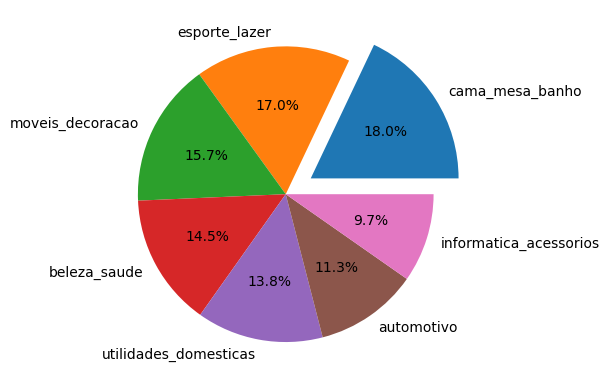

In [70]:
col = st.columns(2, gap="medium")
with col[0]:
    st.write("Top 10 Product E-Commerce Terbanyak")

    fig, ax = plt.subplots()
    product_frequent = (
        products.groupby(by=["product_category_name"])
        .product_category_name.count()
        .sort_values(ascending=False)
        .head(7)
        .to_dict()
    )
    product_frequent = dict(
        sorted(product_frequent.items(), key=lambda x: x[1], reverse=True)
    )
    plt.pie(
        x=product_frequent.values(),
        labels=product_frequent.keys(),
        autopct="%1.1f%%",
        explode=list(
            map(
                lambda x: 0.2 if x == max(product_frequent.values()) else 0,
                product_frequent.values(),
            )
        ),
    )

    st.pyplot(fig)

### Pertanyaan 3: Produk apa yang memiliki penjualan terbanyak?

In [72]:
with col[1]:
    st.write("Kategori Produk dengan Penjualan Terbanyak")

    fig, ax = plt.subplots()
    mostSoldItem = getMostSoldItems(
        product_df=products, order_items_df=order_items
    )
    # plt.barh(y=list(mostSoldItem.keys()), width=list(mostSoldItem.values()))
    plt.xlabel("Total Penjualan")
    st.pyplot(fig)

2024-12-20 14:19:59.129 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 14:19:59.149 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 14:19:59.157 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 14:19:59.158 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 14:19:59.579 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 14:20:00.302 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 14:20:00.307 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


### Pertanyaan 4: Bagaimana korelasi antara berat produk dan harga produk?

In [ ]:
st.write("Korelasi Berat Produk dengan Harga Produk")
fig, ax = plt.subplots()
data = getCorrelatProduct(products, order_items)
sn.scatterplot(x=data["product_weight_g"].values(), y=data["price"].values())
plt.xlabel("Berat Produk (gram)")
plt.ylabel("Harga (USD)")
st.pyplot(fig)

dapatkan nilai korelasinya

In [ ]:
print(
    Pearson_correlation(
        np.array(list(data["product_weight_g"].values())),
        np.array(list(data["price"].values())),
    )
)

### Pertanyaan 5: Metode penjualan apa yang sering dipakai oleh customer?

In [ ]:
st.subheader("Analisa Metode Pembayaran")

In [ ]:
with st.container():

    payDistribute = getProductPaymentDistribute(
        products, order_items, order_payments
    ).to_dict()
    method_payment = ["boleto", "credit_card", "debit_card", "voucher"]

    temp = {}
    for k, v in payDistribute.items():
        if k[0] in mostSoldItem.keys():
            if k[0] not in temp.keys():
                temp[k[0]] = {}
            temp[k[0]][k[1]] = v

    # fill another method with 0
    for k, v in temp.items():
        for i in method_payment:
            if i not in v.keys():
                temp[k][i] = 0

    barWidth = 0.25
    fig, ax = plt.subplots()

    boleto = list(map(lambda x: x["boleto"], temp.values()))
    credit_card = list(map(lambda x: x["credit_card"], temp.values()))
    debit_card = list(map(lambda x: x["debit_card"], temp.values()))
    voucher = list(map(lambda x: x["voucher"], temp.values()))

    br1 = np.arange(len(boleto))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]
    br4 = [x + barWidth for x in br3]

    plt.barh(br1, boleto, color="r", height=barWidth, edgecolor="grey", label="Boleto")
    plt.barh(
        br2,
        credit_card,
        color="g",
        height=barWidth,
        edgecolor="grey",
        label="Credit Card",
    )
    plt.barh(
        br3,
        debit_card,
        color="b",
        height=barWidth,
        edgecolor="grey",
        label="Debit Card",
    )
    plt.barh(
        br4,
        voucher,
        color="hotpink",
        height=barWidth,
        edgecolor="grey",
        label="Voucher",
    )

    plt.ylabel("Product Name")
    plt.xlabel("Banyak Pemakaian")
    plt.yticks([r + barWidth for r in range(len(boleto))], mostSoldItem.keys())
    plt.legend()

    st.pyplot(fig)

### Pertanyaan 7: Bagaimana skor ulasan untuk setiap produk? dan produk apa yang layak menjadi 'best seller' untuk masing-masing kategori?

In [ ]:
st.subheader("Analisa Kualitas Produk")

chooseProductCategory = st.selectbox(
    label="Pilih kategori produk",
    options=dict.fromkeys(products.product_category_name.sort_values()),
)
scoreReview = [i for i in range(1, 6)]

st.code(f"Produk Best Seller dari Kategori {chooseProductCategory}")

data = getProductReview(
    products[products.product_category_name == chooseProductCategory],
    order_items,
    order_reviews,
)
qtySoldProduct = getSoldProduct(orders, order_items)

produkReview = decode_dict(data.value_counts().to_dict())

for k, v in produkReview.items():
    for j in scoreReview:
        if j not in v.keys():
            produkReview[k][j] = 0

data = pd.merge(
    data.agg({"review_score": "count"}),
    data.agg({"review_score": "mean"}),
    how="inner",
    on="product_id",
)
data.rename(
    columns={"review_score_x": "total_penilaian", "review_score_y": "review_score"},
    inplace=True,
)
data["review_list"] = produkReview.values()
data.sort_values(by=["total_penilaian", "review_score"], ascending=False, inplace=True)

col = st.columns(2)
for i in range(len(col)):
    with col[i]:
        index = data.index.values[i]
        st.write(f"Produk ID : {index}")
        st.write(
            f"{round(data.at[index,'review_score'],1)}:star: ({data.at[index,'total_penilaian']} Ulasan, {qtySoldProduct.loc[index]} Penjualan)"
        )
        inner_col = st.columns(5)
        for j in range(len(inner_col)):
            with inner_col[j]:
                st.button(
                    label=f"{j+1}:star: ({data.at[index, 'review_list'][j+1]})",
                    disabled=True,
                    key=np.random.random(),
                )

### Pertanyaan 8: Bagaimana korelasi antara panjang deskripsi suatu produk terhadap skor ulasannya?

In [ ]:
st.write("Korelasi Panjang Deskripsi Produk dengan Tingkat Kepuasan Pelanggan")

data = getCorrelatProductDescWithReview(
    products, orders, order_items, order_reviews
).to_dict()
fig, ax = plt.subplots()

sn.scatterplot(
    x=data["product_description_lenght"].values(), y=data["review_score"].values()
)

plt.xlabel("Panjang Deskripsi Produk (Letter)")
plt.ylabel("Score Review (Mean)")
st.pyplot(fig)

dapatkan nilai korelasinya

In [ ]:
print(
    Pearson_correlation(
        np.array(list(data["product_description_lenght"].values())),
        np.array(list(data["review_score"].values())),
    )
)

### Pertanyaan 6: Negara Bagian mana yang memiliki total pembelian/customer terbanyak?

In [ ]:
st.subheader("Geolocate Analysis")

In [ ]:
data = getMostSellestCountries(orders, order_items, sellers).to_dict()
list_state = [f"{k} ({v} Pembelian)" for k, v in data.items()]

st.write("Negara Bagian dengan Penjualan Produk Terbanyak")
data = (
    getCorrelatBuyerSellerLocation(orders, order_items, customers, sellers)
    .groupby(by=["seller_state"])
    .value_counts()
    .to_dict()
)
temp = {}
for k, v in data.items():
    if k[0] not in temp.keys():
        temp[k[0]] = {}
    temp[k[0]][k[1]] = v

seller_state_option = st.selectbox(label="Negara Penjual", options=list_state)

if seller_state_option != None:
    with st.container():
        fig, ax = plt.subplots(nrows=1, ncols=1)
        plt.bar(
            x=temp[seller_state_option.split(" ")[0]].keys(),
            height=temp[seller_state_option.split(" ")[0]].values(),
        )
        ax.set_xlabel("Negara Pembeli")
        ax.set_ylabel("Total Pembelian")
        ax.set_title("Distribusi Negara Penjual dengan Negara Pembeli")
        plt.xticks(rotation=60)
        st.pyplot(fig)

## Conclusion

- Bagaimana dengan analisis penjualan?
    - Data terlampir pada grafik di web
- Produk apa yang mempunyai qty terbanyak?
    - Bed Bath Table
- Produk apa yang memiliki penjualan terbanyak?
    - Bed Bath Table
- Bagaimana korelasi antara berat produk dan harga produk?
    - Dari perhitungan korelasi menggunakan metode 'Pearson' didapatkan 0.3628048291593886 yang mana berarti termasuk _Positive Correlation_ atau memiliki korelasi yang kuat atau cukup bersesuaian
- Metode penjualan apa yang sering dipakai oleh customer?
    - Credit Card
- Negara apa yang memiliki total pembelian/customer terbanyak?
    - SP (São Paulo)
- Bagaimana skor ulasan untuk setiap produk? dan produk apa yang layak menjadi 'best seller' untuk masing-masing kategori?
    - Untuk detail lengkapnya ada di dalam dashboard
- Bagaimana korelasi antara panjang deskripsi suatu produk terhadap skor ulasannya?
    - Didapatkan 0.02878979835027682 sebagai nilai korelasi dan termasuk _Positive Correlation_ bisa dikatakan memiliki korelasi yang cukup lemah atau hampir tidak bersesuaian

# RFM Analysis



In [ ]:
st.subheader("RFM Analysis")

In [ ]:
rfm_df = createRFM(orders, order_items)

col = st.columns(3, gap="large")

with col[0]:
    fig, ax = plt.subplots(nrows=1, ncols=1)
    avg_recency = round(rfm_df.recency.mean(), 2)
    st.metric("Avg Ketepatan Waktu Pembelian", value=avg_recency)
    data = rfm_df.sort_values(by="recency").reset_index().head(10)
    plt.bar(x=data.customer_id, height=data.recency)
    ax.set_xlabel("Customer ID")
    ax.set_ylabel("Recency")
    ax.set_title("Recency Distribution")
    st.pyplot(fig)

with col[1]:
    fig, ax = plt.subplots(nrows=1, ncols=1)
    avg_frequency = round(rfm_df.frequency.mean(), 2)
    st.metric("Avg Frekuensi Pembelian", value=avg_frequency)
    data = rfm_df.sort_values(by="frequency", ascending=False).reset_index().head(10)
    plt.bar(x=data.customer_id, height=data.frequency)
    ax.set_xlabel("Customer ID")
    ax.set_ylabel("Frequency")
    ax.set_title("Frequency Distribution")
    st.pyplot(fig)

with col[2]:
    fig, ax = plt.subplots(nrows=1, ncols=1)
    avg_moneter = locale.currency(round(rfm_df.monetary.mean()), grouping=True)
    st.metric("Avg Moneter Pembelian", value=avg_moneter)
    data = rfm_df.sort_values(by="monetary", ascending=False).reset_index().head(10)
    plt.bar(x=data.customer_id, height=data.monetary)
    ax.set_xlabel("Customer ID")
    ax.set_ylabel("Monetary")
    ax.set_title("Monetary Distribution")
    st.pyplot(fig)

# formula from gfg source
rfm_df["R_rank"] = rfm_df.recency.rank(ascending=False)
rfm_df["F_rank"] = rfm_df.frequency.rank(ascending=True)
rfm_df["M_rank"] = rfm_df.monetary.rank(ascending=True)

rfm_df["R_rank_norm"] = (rfm_df["R_rank"] / rfm_df["R_rank"].max()) * 100
rfm_df["F_rank_norm"] = (rfm_df["F_rank"] / rfm_df["F_rank"].max()) * 100
rfm_df["M_rank_norm"] = (rfm_df["F_rank"] / rfm_df["M_rank"].max()) * 100

rfm_df.drop(columns=["R_rank", "F_rank", "M_rank"], inplace=True)

rfm_df["RFM_Score"] = (
    0.15 * rfm_df["R_rank_norm"]
    + 0.28 * rfm_df["F_rank_norm"]
    + 0.57 * rfm_df["M_rank_norm"]
)
rfm_df["RFM_Score"] *= 0.05
rfm_df = rfm_df.round(2).sort_values(by="RFM_Score", ascending=False).reset_index()

st.write("Top 10 Highest RFM Score")
st.write(rfm_df[["customer_id", "RFM_Score"]].head(10).transpose())

RFM_score > 4.5     ==> Top Customer
4.5 > RFM_score > 4 ==> High Value Customer
4 > RFM_score > 3   ==> Medium Value Customer
3 > RFM_score > 1.6 ==> Low Value Customer
RFM_score < 1.6     ==> Lost Customer